In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp
%load_ext autoreload
%autoreload 2

file_name = 'ridehailing.csv'

In [2]:
results_df = pd.read_csv(file_name)


In [3]:

results_df = results_df.dropna(subset="dropoff_time") # drop cars
results_df = results_df[results_df.dropoff_time != -1] # drop passengers that left
results_df = results_df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')


results_df['strategy'] = results_df['strategy'].astype(str)
results_df['waitingTime'] = results_df['pickup_time'] - results_df['request_time']
# results_df['travelTime'] = results_df['dropoff_time'] - results_df['pickup_time']
# results_df['arrivalTime'] = results_df['waitingTime'] + results_df['travelTime']




results_df

avgs = results_df.groupby(['strategy', 'num_drivers'])['waitingTime'].mean().reset_index()

avgs_df = pd.DataFrame(avgs)
groups = (avgs_df.groupby(['strategy']))


C:\Users\lokhe\AppData\Local\Temp\ipykernel_10188\2093418377.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


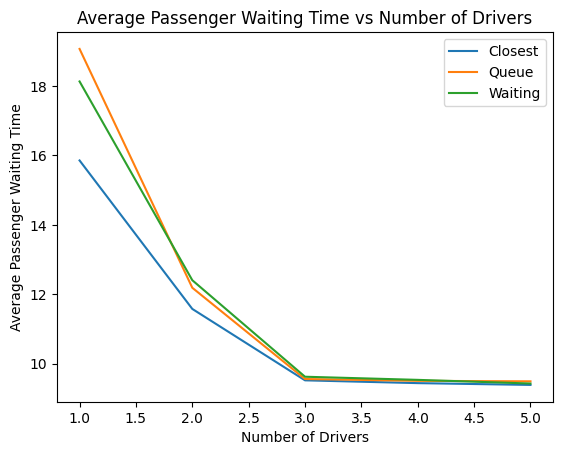

In [4]:

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['num_drivers'], group['waitingTime'], label=name)

ax.legend()

ax.set_xlabel('Number of Drivers')
ax.set_ylabel(f'Average Passenger Waiting Time')
ax.set_title(f'Average Passenger Waiting Time vs Number of Drivers')

plt.legend(['Closest', 'Queue', 'Waiting'], loc='upper right')

plt.savefig(f'figures/Wait_time.png')


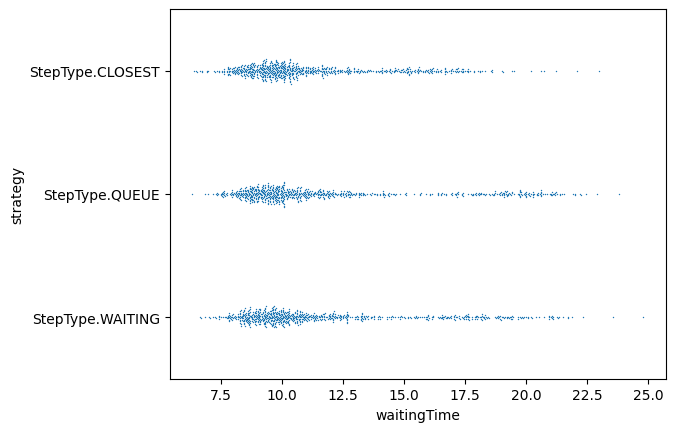

In [5]:

n=5

avgs_by_agent = results_df.groupby(['strategy', 'num_drivers', "sec_id"])['waitingTime'].mean().reset_index()
# display(avgs_by_agent)
# avgs_df = pd.DataFrame(avgs)
n_car = avgs_by_agent[avgs_by_agent["num_drivers"]== n]
sns.swarmplot(x="waitingTime", y="strategy", data=avgs_by_agent, size=1)
plt.savefig(f'figures/swarm_{n}.png')


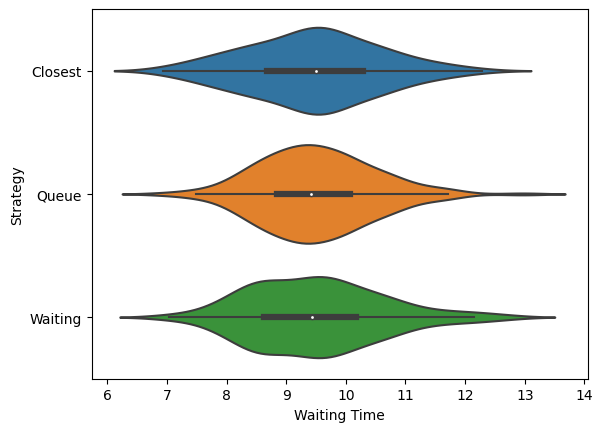

In [17]:
n=5
n_car = avgs_by_agent[avgs_by_agent["num_drivers"]== n]


ax = sns.violinplot(x="waitingTime", y="strategy", data=n_car, size=1)
ax.set_yticklabels(['Closest', 'Queue', 'Waiting'])
ax.set_xlabel("Waiting Time")
ax.set_ylabel("Strategy")
plt.savefig(f'figures/violin_{n}.png')

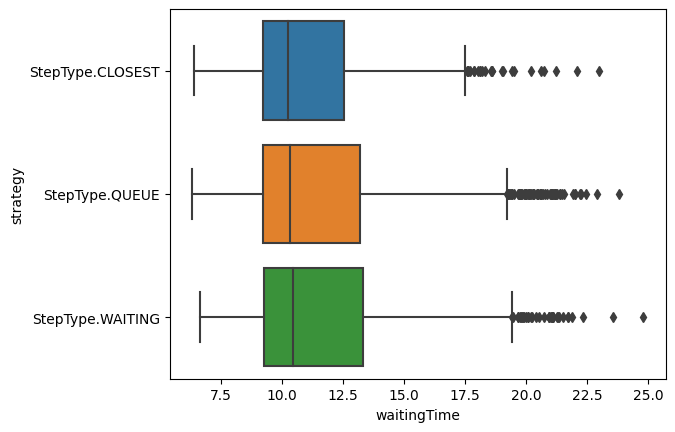

In [7]:
n=1
sns.boxplot(x="waitingTime", y="strategy", data=avgs_by_agent)


plt.savefig(f'figures/box_{n}.png')

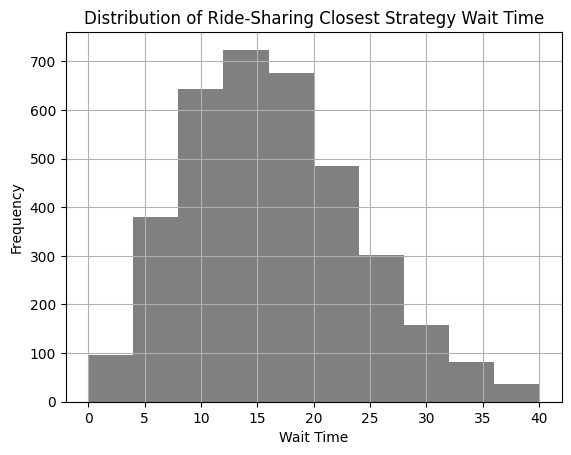

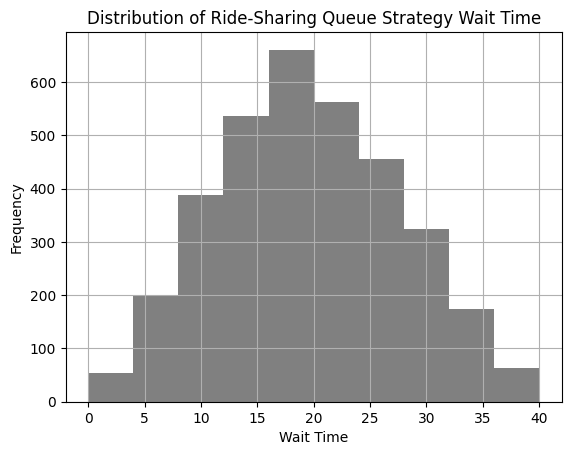

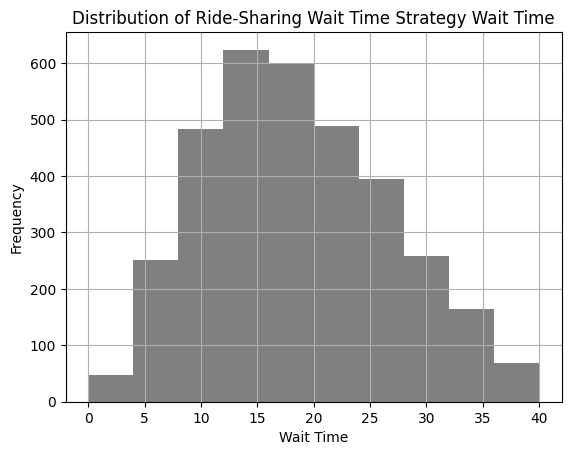

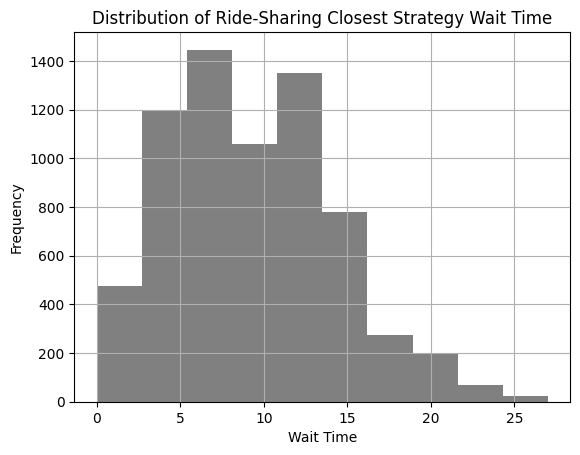

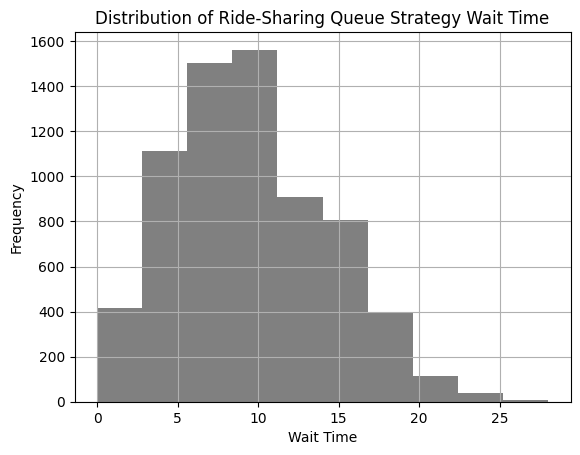

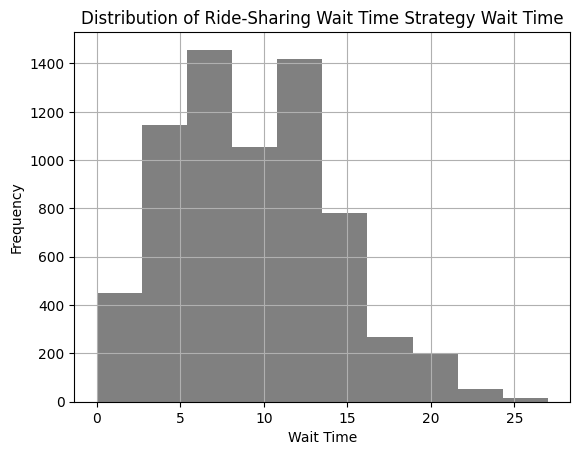

In [8]:
# HISTOGRAMS

labels = ['Wait Time']

for n in [1,5]:
    n_car = results_df[results_df["num_drivers"]== n]

    closest = n_car[n_car["strategy"] == "StepType.CLOSEST"]
    queue = n_car[n_car["strategy"] == "StepType.QUEUE"]
    waiting = n_car[n_car["strategy"] == "StepType.WAITING"]

    closest.hist(column='waitingTime', color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Closest Strategy {labels[0]}")
    plt.savefig(f'figures/{labels[0]}_closest_{n}.png')


    queue.hist(column='waitingTime',  color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Queue Strategy {labels[0]}")
    plt.savefig(f'figures/{labels[0]}_queue_{n}.png')


    waiting.hist(column='waitingTime',  color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Wait Time Strategy {labels[0]}")
    # plt.savefig(f'figures/{labels[0]}_waiting_{n}.png')

    # plt.show()

## stats testing

In [9]:
for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        group = results_df[(results_df["strategy"] == strategy) & (results_df["num_drivers"] == i)]

        
        stat, p = shapiro(group["waitingTime"])

        # Print the test statistic and p-value
        print("Shapiro-Wilk test statistic:", stat)
        print("p-value:", p)
        if p < 0.05:
            print("Reject", strategy, i)

Shapiro-Wilk test statistic: 0.9804543256759644
p-value: 7.958217633615841e-22
Reject StepType.CLOSEST 1
Shapiro-Wilk test statistic: 0.9749720096588135
p-value: 2.711185796513372e-31
Reject StepType.CLOSEST 2
Shapiro-Wilk test statistic: 0.9811651110649109
p-value: 7.13816081972991e-29
Reject StepType.CLOSEST 3
Shapiro-Wilk test statistic: 0.9817627668380737
p-value: 1.1660330995998637e-28
Reject StepType.CLOSEST 4
Shapiro-Wilk test statistic: 0.9781730771064758
p-value: 3.545825341811903e-31
Reject StepType.CLOSEST 5
Shapiro-Wilk test statistic: 0.9911462068557739
p-value: 9.490321804242127e-14
Reject StepType.QUEUE 1
Shapiro-Wilk test statistic: 0.978218138217926
p-value: 2.227080989406884e-29
Reject StepType.QUEUE 2
Shapiro-Wilk test statistic: 0.9776556491851807
p-value: 3.115807879185055e-31
Reject StepType.QUEUE 3
Shapiro-Wilk test statistic: 0.9822726249694824
p-value: 2.3267590584967253e-28
Reject StepType.QUEUE 4
Shapiro-Wilk test statistic: 0.9825859069824219
p-value: 3.2350

c:\Users\lokhe\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:

for i in range(1,6):
    group1 = results_df[(results_df["strategy"] == "StepType.CLOSEST") & (results_df["num_drivers"] == i)]['waitingTime']
    group2 = results_df[(results_df["strategy"] == "StepType.QUEUE") & (results_df["num_drivers"] == i)]['waitingTime']
    group3 = results_df[(results_df["strategy"] == "StepType.WAITING") & (results_df["num_drivers"] == i)]['waitingTime']

    stat, p = kruskal(group1, group2, group3)

    print('Statistics=%.3f, p=%f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Samples look to be drawn from the same distributions (fail to reject H0)')
    else:
        print('Samples look to be drawn from different distributions (reject H0)')

Statistics=305.079, p=0.000000
Samples look to be drawn from different distributions (reject H0)
Statistics=44.426, p=0.000000
Samples look to be drawn from different distributions (reject H0)
Statistics=1.189, p=0.551811
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=1.079, p=0.582985
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=2.993, p=0.223940
Samples look to be drawn from the same distributions (fail to reject H0)


In [11]:
# posthoc analysus - pairwise t test use dunns test for non-parametric data
data = results_df[(results_df["num_drivers"] == 1)]

p_values= sp.posthoc_dunn(data,val_col='waitingTime', group_col='strategy', p_adjust = 'bonferroni')
 
print(p_values)


                  StepType.CLOSEST  StepType.QUEUE  StepType.WAITING
StepType.CLOSEST      1.000000e+00    8.069314e-65      1.896916e-30
StepType.QUEUE        8.069314e-65    1.000000e+00      2.142044e-07
StepType.WAITING      1.896916e-30    2.142044e-07      1.000000e+00


In [12]:
# posthoc analysus - pairwise t test use dunns test for non-parametric data
data = results_df[(results_df["num_drivers"] == 2)]

p_values= sp.posthoc_dunn(data,val_col='waitingTime', group_col='strategy', p_adjust = 'bonferroni')
 
print(p_values)


                  StepType.CLOSEST  StepType.QUEUE  StepType.WAITING
StepType.CLOSEST      1.000000e+00    4.691198e-07      1.953406e-09
StepType.QUEUE        4.691198e-07    1.000000e+00      1.000000e+00
StepType.WAITING      1.953406e-09    1.000000e+00      1.000000e+00
